In [17]:
import os 
import pickle
import json

# For data manipulation
import pandas as pd
import numpy as np

# For time series analysis
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# For data visualisation
import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('seaborn-darkgrid')

# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
import keras

In [2]:
def custom_sum(x):
  """
  This function checks if the value is in the skip list and returns 0 if it is.
  Otherwise, it returns the value itself.
  """
  skip_values = [5, 7]  # Values to exclude from cumulative sum
  if x in skip_values:
    return 0
  else:
    return x

In [3]:
data1=[]
rootdir = 'T20_matches'
cnt=0
for subdir, dirs, files in os.walk(rootdir):
    try: 
        for file in files:
            # print(cnt)
            if(file[-1]=='v'):
                continue
            
            if file.endswith('1.pkl'):
                # print(cnt)
                with open(os.path.join(subdir,file), 'rb') as f:
                    data1 = (pickle.load(f))
                    # print(data1)
                    with open(os.path.join(subdir,"match_info.json")) as file:
                        match_info = json.load(file)
                    if cnt==0:
                        df1 = pd.DataFrame(data1,columns=['bowler', 'batsman', 'wickets', 'over', 'outcome'])                        
                        # print("Hi")
                        df1['batting_team'] = match_info['First Innings']
                        df1['bowling_team'] = match_info['Second Innings']
                        df1['venue'] = match_info['Stadium Name']
                        df1['toss_won'] = int(match_info['Toss Winner'] == match_info['Second Innings'])
                        # df1['target_score'] = int(match_info['First Innings runs'])
                        df1['runs'] = df1['outcome'].apply(custom_sum).cumsum() 
                        # cnt+=1
                    else:
                        dft = pd.DataFrame(data1,columns=['bowler', 'batsman', 'wickets', 'over', 'outcome'])
                        dft['batting_team'] = match_info['First Innings']
                        dft['bowling_team'] = match_info['Second Innings']
                        dft['venue'] = match_info['Stadium Name']
                        dft['toss_won'] = int(match_info['Toss Winner'] == match_info['Second Innings'])
                        # df1['target_score'] = int(match_info['First Innings runs'])
                        dft['runs'] = dft['outcome'].apply(custom_sum).cumsum() 
                        df1 = pd.concat([df1,dft],ignore_index=True)
                    cnt+=1
                    
    except: 
        pass

In [4]:
df1

,bowler,batsman,wickets,over,outcome,batting_team,bowling_team,venue,toss_won,runs
0,Mortaza_Bangladesh,Warner_Australia,0,1,0,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,0
1,Mortaza_Bangladesh,Warner_Australia,0,1,0,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,0
2,Mortaza_Bangladesh,Warner_Australia,0,1,1,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,1
3,Mortaza_Bangladesh,Watson_Australia,0,1,0,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,1
4,Mortaza_Bangladesh,Watson_Australia,0,1,1,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,2
...,...,...,...,...,...,...,...,...,...,...
30544,Vitori_Zimbabwe,Shehzad_Pakistan,1,20,2,Pakistan,Zimbabwe,Harare Sports Club,1,173
30545,Vitori_Zimbabwe,Shehzad_Pakistan,1,20,2,Pakistan,Zimbabwe,Harare Sports Club,1,175
30546,Vitori_Zimbabwe,Shehzad_Pakistan,1,20,1,Pakistan,Zimbabwe,Harare Sports Club,1,176
30547,Vitori_Zimbabwe,Hafeez_Pakistan,1,20,1,Pakistan,Zimbabwe,Harare Sports Club,1,177


In [5]:
cat_cols = ['bowler', 'batsman', 'batting_team', 'bowling_team', 'venue']
for category in cat_cols:
    df1[category] = pd.Categorical(df1[category])
    df1[category+"_idx"] = df1[category].cat.codes

df1

,bowler,batsman,wickets,over,outcome,batting_team,bowling_team,venue,toss_won,runs,bowler_idx,batsman_idx,batting_team_idx,bowling_team_idx,venue_idx
0,Mortaza_Bangladesh,Warner_Australia,0,1,0,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,0,155,351,0,1,19
1,Mortaza_Bangladesh,Warner_Australia,0,1,0,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,0,155,351,0,1,19
2,Mortaza_Bangladesh,Warner_Australia,0,1,1,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,1,155,351,0,1,19
3,Mortaza_Bangladesh,Watson_Australia,0,1,0,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,1,155,353,0,1,19
4,Mortaza_Bangladesh,Watson_Australia,0,1,1,Australia,Bangladesh,"Kensington Oval, Bridgetown, Barbados",0,2,155,353,0,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30544,Vitori_Zimbabwe,Shehzad_Pakistan,1,20,2,Pakistan,Zimbabwe,Harare Sports Club,1,173,264,294,5,9,16
30545,Vitori_Zimbabwe,Shehzad_Pakistan,1,20,2,Pakistan,Zimbabwe,Harare Sports Club,1,175,264,294,5,9,16
30546,Vitori_Zimbabwe,Shehzad_Pakistan,1,20,1,Pakistan,Zimbabwe,Harare Sports Club,1,176,264,294,5,9,16
30547,Vitori_Zimbabwe,Hafeez_Pakistan,1,20,1,Pakistan,Zimbabwe,Harare Sports Club,1,177,264,110,5,9,16


In [7]:
df2 = df1[['bowler_idx', 'batsman_idx', 'wickets', 'over', 'batting_team_idx', 'bowling_team_idx', 'venue_idx', 'toss_won','runs', 'outcome']] 
# 'curr_bats_Runs','0','1','2','3','4','5','6','7'

In [8]:
def create_sequences(df, max_len):
  """
  This function extracts sequences of a fixed length from a Pandas DataFrame 
  containing cricket match data and creates sequences with arrays of features.

  Args:
      df: A Pandas DataFrame containing cricket match data (e.g., batsman, bowler, outcome for each ball).
      max_len: The desired length of each sequence (number of balls).

  Returns:
      A numpy array of shape (num_sequences, max_len, features) containing sequences.
  """

  sequences = []
  for i in range(df.shape[0] - max_len + 1):  # Slide window approach
    sequence = []
    for j in range(i, i + max_len):
      # Access data for each ball using row indexing
      ball_data = df.iloc[j]
      # Create a numpy array of features for this ball
      features = np.array([ball_data[col] for col in df.columns if col not in ['index','bowler', 'batsman', 'batting_team', 'bowling_team', 'venue']])  # Exclude index column
      sequence.append(features)  # Append array of features to sequence
    sequences.append(sequence)

  # Convert sequences to numpy array (no reshape needed here)
  sequences = np.array(sequences)
  return sequences
def get_target_variable(sequence):
  """
  This function retrieves the target variable (outcome of the next ball) 
  corresponding to a sequence of balls.

  Args:
      sequence: A list representing a sequence of balls (features for each ball).

  Returns:
      The target variable (outcome of the next ball) encoded as needed.
  """
  # Assuming the outcome is the last element in the sequence (modify as needed)
  target_variable = sequence[-1][-1]
  # Encode the target variable (e.g., one-hot encoding for multi-class classification)
  # ... (your target variable encoding logic) ...
  return target_variable

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Define parameters (replace with your values)
max_len = 12  # Maximum sequence length (number of balls)
num_features = 8  # Total number of features after encoding (replace with actual number)


In [10]:
sequences = create_sequences(df2, max_len)
target_variables = []
for sequence in sequences:  # Function to create sequences of length max_len
    target_variables.append(get_target_variable(sequence)) 

In [11]:
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', value=-1)
padded_sequences

array([[[155, 351,   0, ...,   0,   0,   0],
        [155, 351,   0, ...,   0,   0,   0],
        [155, 351,   0, ...,   0,   1,   1],
        ...,
        [215, 353,   0, ...,   0,   5,   2],
        [215, 353,   0, ...,   0,   6,   1],
        [215, 351,   0, ...,   0,  12,   6]],

       [[155, 351,   0, ...,   0,   0,   0],
        [155, 351,   0, ...,   0,   1,   1],
        [155, 353,   0, ...,   0,   1,   0],
        ...,
        [215, 353,   0, ...,   0,   6,   1],
        [215, 351,   0, ...,   0,  12,   6],
        [215, 351,   0, ...,   0,  16,   4]],

       [[155, 351,   0, ...,   0,   1,   1],
        [155, 353,   0, ...,   0,   1,   0],
        [155, 353,   0, ...,   0,   2,   1],
        ...,
        [215, 351,   0, ...,   0,  12,   6],
        [215, 351,   0, ...,   0,  16,   4],
        [155, 353,   0, ...,   0,  16,   7]],

       ...,

       [[137, 110,   1, ...,   1, 152,   6],
        [137, 110,   1, ...,   1, 153,   1],
        [179, 110,   1, ...,   1, 154,   1

In [12]:
X_train = []
y_train = []
outcome_index = -1  # Assuming outcome is the last element in each sequence
for sequence in sequences:
    # Extract features (excluding outcome)
    # features = [element for element in sequence[:-1] if element != sequence[outcome_index]]  # List comprehension for selective exclusion
    # X_train.append(sequence[:-1][:,:-1])
    X_train.append(sequence[:,:-1])
    
    # Extract target variable (outcome)
    target = sequence[-1][outcome_index]
    y_train.append(target)
X_train = np.array(X_train)
y_train = np.array(y_train)
n_train_time = int(0.8 * X_train.shape[0])
X_train ,X_test = X_train[:n_train_time], X_train[n_train_time:]
print(X_train.shape, X_test.shape)
y_train, y_test = y_train[:n_train_time], y_train[n_train_time:]
print(y_train.shape, y_test.shape)

(24430, 12, 9) (6108, 12, 9)
(24430,) (6108,)


In [13]:
y_train1= (pd.get_dummies(pd.DataFrame(y_train, columns=['outcome'])['outcome'],prefix= 'outcome',dtype= int).values)

In [14]:
y_test1= (pd.get_dummies(pd.DataFrame(y_test, columns=['outcome'])['outcome'],prefix= 'outcome',dtype= int).values) 

Epoch 1/100
764/764 - 5s - loss: 5.8296 - accuracy: 0.3682 - val_loss: 4.9300 - val_accuracy: 0.3661 - 5s/epoch - 6ms/step
Epoch 2/100
764/764 - 3s - loss: 5.2202 - accuracy: 0.3690 - val_loss: 4.4360 - val_accuracy: 0.3612 - 3s/epoch - 3ms/step
Epoch 3/100
764/764 - 3s - loss: 6.5258 - accuracy: 0.3473 - val_loss: 8.5340 - val_accuracy: 0.3266 - 3s/epoch - 3ms/step
Epoch 4/100
764/764 - 3s - loss: 6.4981 - accuracy: 0.3347 - val_loss: 4.2935 - val_accuracy: 0.3708 - 3s/epoch - 4ms/step
Epoch 5/100
764/764 - 3s - loss: 5.6733 - accuracy: 0.3773 - val_loss: 5.5416 - val_accuracy: 0.3733 - 3s/epoch - 3ms/step
Epoch 6/100
764/764 - 3s - loss: 5.7941 - accuracy: 0.3774 - val_loss: 5.5416 - val_accuracy: 0.3733 - 3s/epoch - 4ms/step
Epoch 7/100
764/764 - 3s - loss: 5.7941 - accuracy: 0.3774 - val_loss: 5.5416 - val_accuracy: 0.3733 - 3s/epoch - 4ms/step
Epoch 8/100
764/764 - 3s - loss: 5.7941 - accuracy: 0.3774 - val_loss: 5.5416 - val_accuracy: 0.3733 - 3s/epoch - 3ms/step
Epoch 9/100
764/

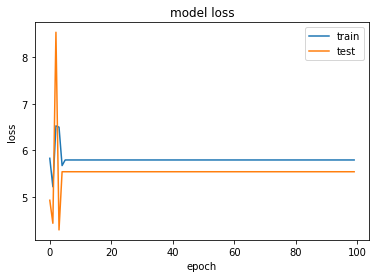

In [19]:
### TODO: create required RNN model
# # build model using keras documentation recommended optimizer initialization
# optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# # compile the model
# model.compile(loss='mean_squared_error', optimizer=optimizer)
np.random.seed(0)
window_size=12
# Define RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(8)
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train1, epochs=100, batch_size=32, validation_data=(X_test, y_test1), verbose=2, shuffle=False)
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Evaluate the model
# loss = model.evaluate(X_test, y_test, verbose=0)
# print("Test Loss:", loss)

In [23]:
def permute_importance(x,y,model,feature):
    """
    This function calculates the permutation importance of a feature in a model.
    
    Args:
        x: A numpy array containing the input features.
        y: A numpy array containing the target variable.
        model: A trained machine learning model.
        feature: The feature for which to calculate the permutation importance.
        
    Returns:
        The permutation importance of the feature.
    """
    baseline = model.evaluate(x, y, verbose=0)[1]  # Baseline accuracy
    x_copy = x.copy()  # Create a copy of the input features
    shuffle_column = x_copy[:, feature]  # Extract the feature to be permuted
    x_copy[:, feature] = np.random.permutation(shuffle_column)  # Permuted feature
    permuted_score = model.evaluate(x_copy, y, verbose=0)[1]  # Score with permuted feature
    return baseline - permuted_score  # Permutation importance

In [24]:
for i in range(0,9):
    print(f"{df2.columns.tolist()[i]} : {permute_importance(X_test, y_test1,model,i)}")

bowler_idx : -0.0006548762321472168
batsman_idx : -0.0014734864234924316
wickets : -0.0008186101913452148
over : -0.0004911720752716064
batting_team_idx : 0.00016373395919799805
bowling_team_idx : 0.00016373395919799805
venue_idx : 0.0003274381160736084
toss_won : -0.00016373395919799805
runs : 0.0008186101913452148


For each match: ball | batsman | bowler | over | wicket | outcome | powerplay | toss_win

- padding to 120?
- replace location with average score at location

In [ ]:
# Create first and second differences of each time series


In [ ]:
# Identify the order of integration of each match?

In [ ]:
# Create a dataframe for the log returns of each time series
var_data = pd.DataFrame(data=[np.log(data[f'{ticker}']/data[f'{ticker}'].shift(1)) for ticker in tickers]).T

# Drop the NaN values
var_data.dropna(inplace=True)

# Check the dataframe dimensions
var_data.shape

In [ ]:
# Create a VAR object
model = VAR(var_data)

# Use the object to fit the VAR
results = model.fit(1)

# Print the estimation summary
results.summary()